# 疫学的因果関係
統計学が物的証拠として使われる代表例としては法律の決定や他何らかのトラブルに対する因果関係を証明するために疫学的因果関係を推定する。ここで、疫学的因果関係は7つの構成要素がある。本項では7つの構成要素の中で「整合性」「必要条件」「十分条件」以外についての文面をそのままプログラムとして実装する。

また、疫学における因果関係はその専門分野の知識を多く持っていなくても使用できるメリットがあるため、研究活動において最初の頃には役に立ちやすい。

なお、適切なデータセットが見つからなかったため項目によって使用するデータセットを変えている。

参考1：https://www.youtube.com/watch?v=lHnblpw4YFU

参考2：https://chuo-kentetsu.co.jp/cgk/topix/tecrep30.pdf

参考3：https://apps.who.int/iris/bitstream/handle/10665/43541/9241547073_jpn.pdf


## ライブラリのインポート

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 順序関係
原因と結果についての順序関係を正しく把握する。例えばX→Yが正しいのかY→Xが正しいかなど、ある事象に対する因果関係における順序について考察する。なお、順序関係は因果関係を推定する上では必須事項となる。

ここでは一例としてゴルフの来場について、天気が原因でゴルフを結果として考えてどの天気の時にゴルフをするか、また結果と原因の順序が変わることで数値の変動を確認する。

### データの確認

In [2]:
df = pd.read_csv("golf.csv", encoding="shift-jis")
df.head()

,天気,気温,湿度,風,ゴルフ
0,晴,29,85,弱,しない
1,晴,27,90,強,しない
2,曇,28,78,弱,する
3,雨,21,96,弱,する
4,雨,20,80,弱,する


### ベイズの定理で原因と結果の確率を計算する

In [3]:
x_name = "天気"
y_name = "ゴルフ"

In [4]:
x_val = list(set(df[x_name].values.tolist()))
for x in x_val:
    dfx = df.query("%s=='%s'"%(x_name, x))
    y_val = list(set(dfx[y_name].values.tolist()))
    for y in y_val:
        dfxy = dfx.query("%s=='%s'"%(y_name, y))
        print("p(%s=%s | %s=%s) = %.2f"%(y_name, y, x_name, x, len(dfxy)/len(dfx)))

p(ゴルフ=する | 天気=晴) = 0.40
p(ゴルフ=しない | 天気=晴) = 0.60
p(ゴルフ=する | 天気=雨) = 0.60
p(ゴルフ=しない | 天気=雨) = 0.40
p(ゴルフ=する | 天気=曇) = 1.00


In [5]:
y_val = list(set(df[y_name].values.tolist()))
for y in y_val:
    dfy = df.query("%s=='%s'"%(y_name, y))
    x_val = list(set(dfy[x_name].values.tolist()))
    for x in x_val:
        dfyx = dfy.query("%s=='%s'"%(x_name, x))
        print("p(%s=%s | %s=%s) = %.2f"%(x_name, x, y_name, y, len(dfyx)/len(dfy)))

p(天気=晴 | ゴルフ=する) = 0.22
p(天気=雨 | ゴルフ=する) = 0.33
p(天気=曇 | ゴルフ=する) = 0.44
p(天気=晴 | ゴルフ=しない) = 0.60
p(天気=雨 | ゴルフ=しない) = 0.40


### 結果の解釈
この結果から曇が原因でゴルフを行う事が結果になることが分かる。元々100%だった「曇→ゴルフ」が「ゴルフ→曇」にした場合は44%に変動し、曇が順序として原因と分かる。

## 量反応関係
調べたい量的変数を選び相関係数を求める。ただし、条件によって変わる可能性を考慮して質的変数で条件を絞り、それによって相関に違いが現れるかを確認する。

ここでは一例としてアヤメの花の可弁の長さとがくの長さに関する相関について品種ごとに分けて計測する。

### データの確認

In [6]:
df = pd.read_csv("iris.csv")
df.head()

,category,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2


### 相関係数の算出と散布図の描画

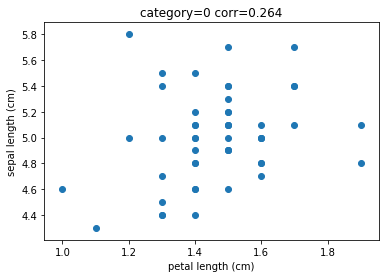

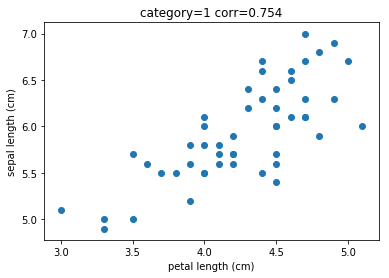

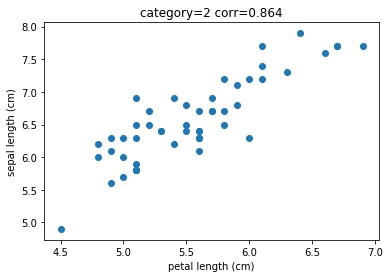

In [7]:
category = "category"
x1_name = "petal length (cm)"
x2_name = "sepal length (cm)"
val = list(set(df[category].values.tolist()))
corrarray = []
for v in val:
    dfv = df.query("%s==%d"%(category, v))
    x1 = dfv[x1_name].values
    x2 = dfv[x2_name].values
    corr = np.corrcoef(x1, x2)[0][1]
    plt.scatter(x1, x2)
    plt.xlabel(x1_name)
    plt.ylabel(x2_name)
    plt.title("%s=%d corr=%.3f"%(category, v, corr))
    plt.show()
    corrarray.append([category, v, corr])

### 項目ごとの相関係数

In [8]:
dfc = pd.DataFrame(corrarray)
dfc.columns = ["項目", "質的数値", "相関係数"]
dfc

,項目,質的数値,相関係数
0,category,0,0.263874
1,category,1,0.754049
2,category,2,0.864225


### 結果の解釈
基本的にがくの長さと花弁の長さは相関関係にある事が分かる。しかし品種「0」の時に相関が弱いため、品種「0」の場合に相関が働かない何らかの要因があると考えられる。

## 強固性
リスク比が大きく原因と結果の強い関連性が高い場合は当該要因が原因である可能性がある。

ここでは一例としてチャールズ川周辺に住んでいる人を分母にし、チャールズ川以外に住む場合の相対危険度(1人当たりの犯罪率)を算出

### データの確認

In [9]:
df = pd.read_csv("boston.csv")
df.head()

,PRICE,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


### 相対危険度の算出

In [10]:
crime0 = df.query("CHAS==0")["CRIM"].values
crime1 = df.query("CHAS==1")["CRIM"].values
print("相対危険度: %.2f"%(np.mean(crime0)/np.mean(crime1)))

相対危険度: 2.02


### 結果の解釈
相対危険度からチャールズ川周辺に住まない場合、チャールズ川周辺に住んでいる場合と比べて約2倍の犯罪率となる。そのためチャールズ川周辺で治安を良くする何らか原因があると考えられる。

## 一致性
過去の類似事例や研究結果などから性質的に一致している事を確認する。ここでは質的変数について、そこから肯定的な結果を含めて相関があるかを算出する。

ここでは一例として現在ライター所持者と喫煙者の関係性についてのデータを分析しているていで、他のデータから同様の兆候が見られるかについて喫煙の有無とライター所持の有無の相関係数を算出する。また、Smokeについては0の時は「非喫煙者」で１の時は「喫煙者」で、Lighterについて0の時は「所持していない」で1の時は「所持している」となっている。

なお、データセットは中村好一著『基礎から学ぶ 楽しい疫学 第4版』のp105にある集計表より作成。

### データの確認

In [11]:
df = pd.read_csv("LungCanser.csv")
df.head()

,Lighter,Smoke,LungCanser
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


### 相関係数の算出

In [12]:
df.corr()

,Lighter,Smoke,LungCanser
Lighter,1.00,0.8,0.32
Smoke,0.80,1.0,0.40
LungCanser,0.32,0.4,1.00


### 結果の解釈
ライターを所持している人と喫煙の相関は0.8となっており非常に強い相関がある事が確認できるため非喫煙者はライターを所持していなく喫煙者はライターを所持している事が分かる。